# "Modulo 2"
> "Analisi della termodinamica di network random attraverso diagonalizzazione esatta dell'Hamiltoniana"

## $$\mathit{H} = \sum_{i,j}^L J_{ij} \sigma_i^z \sigma_{j}^z $$

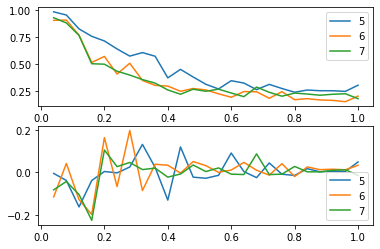

array([0.98824752, 0.93109692, 0.88305858, 0.76745172, 0.50581421,
       0.50156691, 0.43658293, 0.40100664, 0.35927499, 0.32644184,
       0.26334788, 0.22373514, 0.27018878, 0.25112806, 0.27084591,
       0.2351861 , 0.20149273, 0.28976678, 0.24169559, 0.20545148,
       0.2345263 , 0.22549651, 0.2145379 , 0.22342765, 0.22836077,
       0.18255556])

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse.linalg as ssl
import scipy.sparse as ss
import networkx as nx

hh=0
volte=25

volte+=1

#lins=np.linspace(0,3,volte)

fig, (ax1,ax2) = plt.subplots(2,1)

volte2=30
#ell=13
gg=0.3

mmagz=np.zeros(volte)
mmagz2=np.zeros(volte)
xi=np.zeros(volte)
magniz=np.zeros((volte,volte2))
magniz2=np.zeros((volte,volte2))

lind=np.linspace(0,1,volte)
#nume=4

Psii=np.zeros(volte)
#dens=0.15
jay=1

for ell in range(5,8):
    ggg=0
    
    
    for numer in lind:

        NumTot=2**ell
        #ev=np.zeros((volte,NumTot))
        Egs=np.zeros(volte)



        for vo in range(volte2):

            PBC=True

            graph=nx.fast_gnp_random_graph(ell,min(numer/ell,1),directed=True)
            graph2=nx.fast_gnp_random_graph(ell,min(numer/ell,1),directed=True)
            net=nx.adjacency_matrix(graph)-nx.adjacency_matrix(graph2)
            coll=ss.find(net)

            # Costruisco la base

            iSpin=np.zeros((NumTot,ell))
            for ii in range(NumTot):
                itemp=ii
                for jj in range(ell):
                    iSpin[ii,jj]=np.floor(itemp%2)
                    itemp=itemp/2


            # Costruisco l'Hamiltoniana

            HamOut=(np.zeros((NumTot,NumTot)))

            for iHam in range(len(coll[2])):
                for ii in range(NumTot):
                    if iSpin[ii,coll[0][iHam]]==iSpin[ii,coll[1][iHam]]:
                        HamOut[ii,ii]=HamOut[ii,ii] + jay #* coll[2][iHam]  # antiferromagnetico
                    else: HamOut[ii,ii]=HamOut[ii,ii] - jay #* coll[2][iHam]  
                        
            
            # Sigma_z Sigma_z [coupling]

            for iHam in range(ell-1):
                for ii in range(NumTot):
                    if iSpin[ii,iHam]==iSpin[ii,iHam+1]:
                        HamOut[ii,ii]=HamOut[ii,ii]-1
                    else: HamOut[ii,ii]=HamOut[ii,ii]+1  

            # This implements periodic boundary conditions
            if PBC:
                for ii in range(NumTot):
                    if iSpin[ii,ell-1]==iSpin[ii,0]:
                        HamOut[ii,ii]=HamOut[ii,ii]-1
                    else: HamOut[ii,ii]=HamOut[ii,ii]+1

                        
            # Sigma_x  [transverse field]   contorta ma torna: in pratica cambia lo spin al sito j

            for iHam in range(ell):
                for ii in range(NumTot):
                    if iSpin[ii,iHam]==1:
                        Exc = ii - 2**(iHam)
                    else: Exc = ii + 2**(iHam)
                    HamOut[int(Exc),ii] = HamOut[int(Exc),ii] + gg



            #if ell==3 and dens==lind[0]: H1=HamOut

            # Trovo l'autostato del GS

            #Egs[ggg]=ssl.eigsh(HamOut,2)[0][0]
            Psi=ssl.eigsh(HamOut,ell**2)[1].T[0]
            #Psii[ggg]=Psi.copy()

            # Calcolo la magnetizzazione

            #MagX=np.zeros(ell)
            #MagZ=np.zeros(ell)
            MagnetZ=0

            # for iSite in range(ell):
            #    Mx_sum=0
            #    for ii in range(NumTot):
            #        if iSpin[ii,iSite] == 1:
            #            MagZ[iSite] = MagZ[iSite] + abs(Psi[ii])**2
            #            Exc = ii -2**(iSite)
            #        else:
            #            MagZ[iSite] = MagZ[iSite] - abs(Psi[ii])**2
            #            Exc = ii +2**(iSite)
            #        Mx_sum = Mx_sum + np.conjugate(Psi[ii]) * Psi[Exc]
            #    if abs(np.imag(Mx_sum))>10**(-10):
            #        print("Non real magnetization")
            #    MagX[iSite] = np.real(Mx_sum) 

            for ii in range(NumTot):
                Mag_ii = 0
                for iSite in range(ell):
                    if iSpin[ii,iSite] == 1:
                        Mag_ii = Mag_ii + 1
                    else:
                        Mag_ii = Mag_ii - 1
                MagnetZ = MagnetZ + abs(Mag_ii)*(abs(Psi[ii])**2)

            magniz[ggg,vo]= MagnetZ/ell
            magniz2[ggg,vo]=MagnetZ/ell*MagnetZ/ell
        mmagz[ggg]=sum(magniz[ggg])/volte2
        mmagz2[ggg]=sum(magniz2[ggg])/volte2
        xi[ggg]=mmagz2[ggg]-mmagz[ggg-1]*mmagz[ggg-1]

        #ax.plot(ggg*np.ones(volte2),magniz[ggg],"o",label=dens)
        ggg+=1
        #ax.set_ylim(0,1)
    
    ax1.plot(lind[1:],mmagz[1:],label=ell)#,color="black")  
    ax2.plot(lind[1:],xi[1:],label=ell)
ax1.legend()
ax2.legend()
plt.show()
mmagz

In [237]:
        # Sigma_z Sigma_z [coupling]

        for iHam in range(ell-1):
            for ii in range(NumTot):
                if iSpin[ii,iHam]==iSpin[ii,iHam+1]:
                    HamOut[ii,ii]=HamOut[ii,ii]-1
                else: HamOut[ii,ii]=HamOut[ii,ii]+1  
                    
        # This implements periodic boundary conditions
        if PBC:
            for ii in range(NumTot):
                if iSpin[ii,ell-1]==iSpin[ii,0]:
                    HamOut[ii,ii]=HamOut[ii,ii]-1
                else: HamOut[ii,ii]=HamOut[ii,ii]+1
                    
        # Sigma_z  [longitudinal field]

        for iHam in range(ell):
            for ii in range(NumTot):
                if iSpin[ii,iHam]==1:
                    HamOut[ii,ii]=HamOut[ii,ii]-hh
                else: HamOut[ii,ii]=HamOut[ii,ii]+hh

        # Sigma_x  [transverse field]   contorta ma torna: in pratica cambia lo spin al sito j

        for iHam in range(ell):
            for ii in range(NumTot):
                if iSpin[ii,iHam]==1:
                    Exc = ii - 2**(iHam)
                else: Exc = ii + 2**(iHam)
                HamOut[int(Exc),ii] = HamOut[int(Exc),ii] + gg

